# Pointwise Ranking Approach

In [6]:
from data_load import Data_Loader
from predictiv_learning_sklearn import Predictiv_Learner_Sklearn
import pandas as pd

data_loader = Data_Loader()
X_train, y_train, X_test, y_test = data_loader.load_data()
print('data load finished')

Number of training data:  9369528
Number of test data:  1027650
data load finished


In [7]:
X_test.head()

,tfidf,bim25,bim25_alt,unigram,cosine,fasttext,word2vec,qid
MED-10,0.000000,0.000000,0.000000,3.759096e-31,0.005387,0.861747,0.829574,1008
MED-14,0.000000,0.000000,0.000000,3.759096e-31,0.003656,0.849423,0.816418,1008
MED-118,0.818644,1.651842,1.637143,1.311152e-29,0.005481,0.914987,0.904261,1008
MED-301,0.000000,0.000000,0.000000,3.759096e-31,0.007241,0.926591,0.894327,1008
MED-306,0.000000,0.000000,0.000000,3.759096e-31,0.024326,0.931880,0.904871,1008


Time for fit: --- 5286.843659162521 seconds ---
Average precision score, micro-averaged over all classes: 0.99


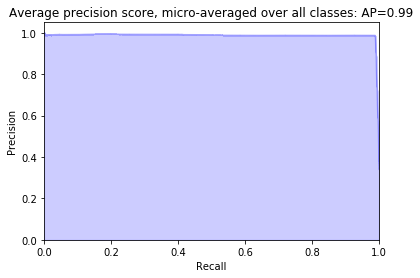

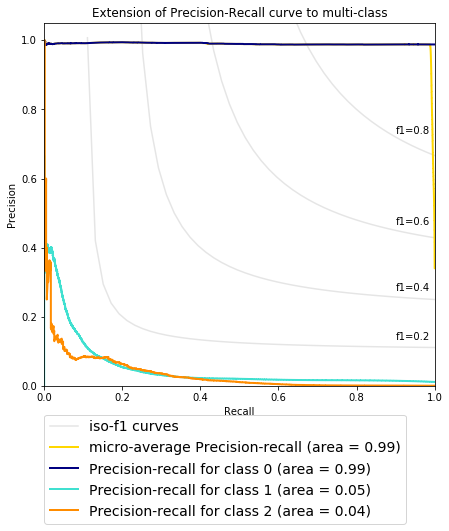

ranking done


In [8]:
pred_sklear = Predictiv_Learner_Sklearn()
ranked_result = pred_sklear.do_prediction(X_train, X_test, y_train, y_test)
print('ranking done')

In [9]:
#Output the ranked lists for ranklib evaluation, no need for features here
def f(x):
    if x.name == 'qid':
        return 'qid:' + x.astype(str)
    else:
        return x

(ranked_result.apply(lambda x: f(x))[['rel','qid']]
  .to_csv('pointwise_ranked.csv', sep=' ', index=False, header=None))